In [67]:

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

training_datagen = ImageDataGenerator(1./255)
validation_datagen = ImageDataGenerator(1./255)

#train_dir = r"C:/Users/pawel/Desktop/Projekt cvapr/DocumentRecognition/mnist_png.tar/mnist_png/training"
train_dir = r"D:/_train"
#val_dir = r"C:/Users/pawel/Desktop/Projekt cvapr/DocumentRecognition/mnist_png.tar/mnist_png/testing"
val_dir = r"D:/_train"
new_train = training_datagen.flow_from_directory(train_dir, #directory containing various fruits
                                                target_size=(28, 28), # all images will be resized to 150, 150 when it is loaded
                                                class_mode="sparse",
                                                color_mode="grayscale") #categorial because of multi-class classification. 
                                                #if only two classes, then "binay"
new_val = validation_datagen.flow_from_directory(val_dir, #directory containing various fruits
                                                target_size=(28, 28), # all images will be resized to 150, 150 when it is loaded
                                                class_mode="sparse",
                                                color_mode="grayscale") #categorial because of multi-class classification. 
                                                #if only two classes, then "binay"
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Found 30 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


0


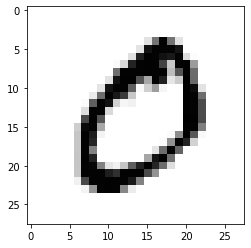

In [68]:
import matplotlib.pyplot as plt
image_index = 1 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [69]:
x_train.shape

(60000, 28, 28)

In [70]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [71]:
#WERSJA 2

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [72]:
#WERSJA 1

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# model = tf.keras.models.Sequential([

#     tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation="relu"),
#     tf.keras.layers.Dropout(0.2),   
#     tf.keras.layers.Dense(10, activation="softmax")
# ]);

In [73]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               605824    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [74]:
# implementing a callback function to terminate training once training reaches 98% accuracy for validation data

validation_accuracy = 1

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("val_accuracy") is not None and logs.get("val_accuracy") >= validation_accuracy):
            print("\nReached desired validation accuracy, so cancelling training")
            self.model.stop_training=True
            
callbacks = myCallback()

In [75]:
#WERSJA 2
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
#model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [76]:
#WERSJA 1
#nie dziala
#model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [77]:
#WERSJA 1
with tf.device('/gpu:0'):
    my_model = model.fit(x=x_train,y=y_train, epochs=1000, validation_data=(new_val), verbose=1, 
                                  callbacks = [callbacks], workers=10)

Epoch 1/1000
1868/1875 [============================>.] - ETA: 0s - loss: 0.1979 - accuracy: 0.9403

C:\Users\pawel\AppData\Local\Programs\Python\Python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1875/1875 [==============================] - 13s 7ms/step - loss: 0.1976 - accuracy: 0.9404 - val_loss: 432.8421 - val_accuracy: 0.5000
Epoch 2/1000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 366.6372 - val_accuracy: 0.5000
Epoch 3/1000
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0562 - accuracy: 0.9821 - val_loss: 411.4867 - val_accuracy: 0.6667
Epoch 4/1000
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 415.9390 - val_accuracy: 0.5333
Epoch 5/1000
 166/1875 [=>............................] - ETA: 13s - loss: 0.0225 - accuracy: 0.9919

KeyboardInterrupt: 

In [ ]:
#WERSJA 2
# bez val accuracy wiec nie bedzie tego na wykresie
#with tf.device('/gpu:0'):
#    my_model = model.fit(x=x_train,y=y_train, epochs=10)


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 4.2916 - accuracy: 0.0815


[4.291617393493652, 0.08150000125169754]

2


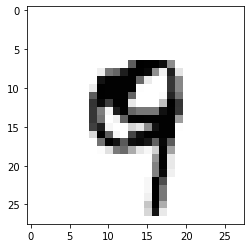

In [ ]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [ ]:
filepath = r"model2"
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format="tf",
    signatures=None
)

model.save("model2.h5")

INFO:tensorflow:Assets written to: model2\assets


In [ ]:
# Convert the model.
converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file('model2.h5')
tflite_model = converter.convert()

# Save the model.
with open('model2.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\pawel\AppData\Local\Temp\tmpbilpbhh5\assets
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from C:\Users\pawel\AppData\Local\Temp\tmpbilpbhh5\variables\variables
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_5_input
INFO:tensorflow: tensor name: serving_default_conv2d_5_input:0, shape: (-1, 28, 28, 1), type: DT_FLOAT
INFO:tensorflow:output tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: dense_11
INFO:tensorflow: tensor name: StatefulPartitionedCall:0, shape: (-1, 10), type: DT_FLOAT
INFO:

In [ ]:

  with open("historia2.txt",'w') as f:
    for k in my_model.history.keys():
        print(k,file=f)
        for i in my_model.history[k]:
            print(i,file=f)

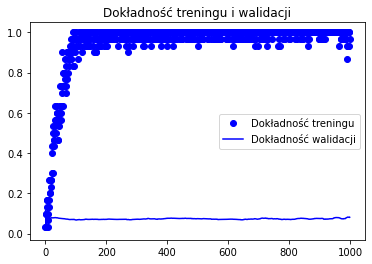

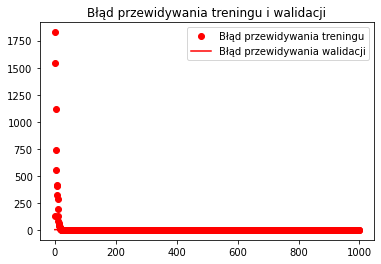

In [ ]:
acc = my_model.history['accuracy'] #training accuracy scores from the model that has been trained
val_acc = my_model.history['val_accuracy'] #validation accuracy scores from the model that has been trained
loss = my_model.history['loss'] #training loss scores from the model that has been trained
val_loss = my_model.history['val_loss'] #validation loss scores from the model that has been trained

epochs = range(len(acc)) #x axis

plt.plot(epochs, acc, 'bo', label = 'Dokładność treningu')
plt.plot(epochs, val_acc, 'b', label = 'Dokładność walidacji')
plt.title('Dokładność treningu i walidacji')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Błąd przewidywania treningu')
plt.plot(epochs, val_loss, 'r', label = 'Błąd przewidywania walidacji')
plt.title('Błąd przewidywania treningu i walidacji')

plt.legend()

plt.show()